<a href="https://colab.research.google.com/github/SampritiMayra/Data_Analysis_prep/blob/main/Diabetes_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression on the Diabetes Dataset**

The objective is to predict based on diagnostic measurements whether a patient has diabetes.


In [48]:
import matplotlib.pyplot as plt
#%matplotlib inline  
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


In [17]:
#importing Dataset
diabetes = datasets.load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [18]:
#Printing info about the dataset
print(diabetes.keys())
print(diabetes.data)
#Dataset Keys
#dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]


In [19]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [20]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [44]:
# Now we will split the data into the independent and dependent variable
X = diabetes.data
Y = diabetes.target

In [45]:
X.shape ,Y.shape

((442, 10), (442,))

In [46]:
# We will split the data into training and testing data
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.3,random_state=99)

train_x.shape, train_y.shape


((309, 10), (309,))

In [24]:
# Linear Regression
from sklearn.linear_model import LinearRegression

In [25]:
model = linear_model.LinearRegression()

In [26]:
model.fit(train_x, train_y)

LinearRegression()

In [27]:
y_pred = model.predict(test_x)
y_pred

array([ 77.9991034 , 170.44712136, 109.03660582, 223.84307065,
        87.38430375, 211.46934588, 223.65994161,  52.81888351,
       149.39008619, 294.9893952 , 127.72956377, 182.90399415,
       102.6375881 , 144.69460471, 171.5213581 , 266.17922455,
       201.8877034 , 166.18209687, 103.67082991, 169.01866852,
       187.13785171, 130.10161695, 151.54411583, 156.45841795,
       121.85578431, 304.14149903, 126.55107098, 158.76430506,
       249.42202516, 154.22310276, 180.85528758, 180.06909853,
       182.96467155, 200.00132316,  73.87031841, 146.19357531,
       165.52522033, 160.93215348, 247.99028596, 210.37177183,
        85.69905264, 211.07539533, 188.10590426, 119.60434815,
       151.80766971, 188.31163328, 185.69251949, 168.92581539,
       291.55993431, 248.60092291, 170.17035216, 208.5515447 ,
        59.08071813, 195.30432554, 190.19923551, 149.97489689,
       114.4835119 , 244.83078249, 254.54782428, 138.88949628,
       301.05425333,  57.71483254, 162.93256009, 187.59

In [28]:
result = pd.DataFrame({'Actual':test_y, 'Predict': y_pred})
result

,Actual,Predict
0,75.0,77.999103
1,128.0,170.447121
2,125.0,109.036606
3,332.0,223.843071
4,37.0,87.384304
...,...,...
128,48.0,202.349391
129,172.0,144.663523
130,51.0,82.400892
131,277.0,185.443544


In [29]:
# we will check the accuracy

print('coefficients', model.coef_)
print('intercept', model.intercept_)

coefficients [  40.66179183 -313.2934701   517.18345014  386.06561935 -604.64289258
  275.31448303    3.92015562  172.39101348  661.95332633   62.26068823]
intercept 155.59120125597175


In [30]:
# mean_squared_error
mean_squared_error(test_y,y_pred)

3157.972848565651

In [49]:
# r2 score
r2_score(test_y,y_pred)

0.4545709909725648

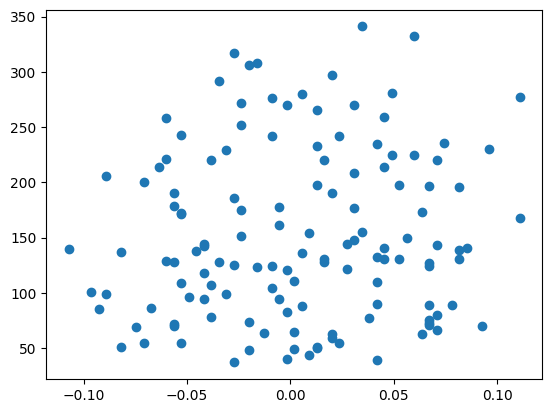

In [39]:
#Visualising using a scatterplot
#I'd bet X_train is 2d (matrix with a single column), while y_train 1d (vector). In turn you get different sizes.
#I think using X_train[:,0] for plotting (which is from where the error originates) should solve the problem
plt.scatter(test_x[:,0], test_y)
plt.show()

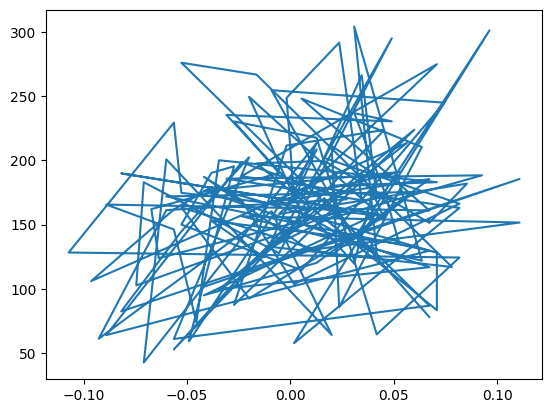

In [40]:
plt.plot(test_x[:,0], y_pred)